In [214]:
your_local_path="../Machine_Learning/Infy_PredictiveUnderwriting/"
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Underwriting_train = pd.read_csv(your_local_path + "train.csv")
Underwriting_test = pd.read_csv(your_local_path + "test.csv")
Underwriting_train.Response.value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [216]:
#corr= Underwriting_train.corr()
#corr

In [217]:
# Stratified sampling
#Underwriting_df.dtypes = int
df_columns=['Product_Info_1','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7','Ins_Age'
,'Ht','Wt','BMI','Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6'
          ,'InsuredInfo_1','InsuredInfo_2','InsuredInfo_3','InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7'
           ,'Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4','Insurance_History_5',
            'Insurance_History_7','Insurance_History_8','Insurance_History_9','Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4',
           'Family_Hist_5','Medical_History_1','Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5','Medical_History_6','Medical_History_7'
           ,'Medical_History_8','Medical_History_9','Medical_History_10','Medical_History_11','Medical_History_12','Medical_History_13','Medical_History_14'
           ,'Medical_History_15','Medical_History_16','Medical_History_17','Medical_History_18','Medical_History_19','Medical_History_20'
           ,'Medical_History_21','Medical_History_22','Medical_History_23','Medical_History_24','Medical_History_25','Medical_History_26','Medical_History_27'
           ,'Medical_History_28','Medical_History_29','Medical_History_30','Medical_History_31','Medical_History_32','Medical_History_33','Medical_History_34'
           ,'Medical_History_35','Medical_History_36','Medical_History_37','Medical_History_38','Medical_History_39','Medical_History_40','Medical_History_41','Medical_Keyword_1'
           ,'Medical_Keyword_2','Medical_Keyword_3','Medical_Keyword_4','Medical_Keyword_5','Medical_Keyword_6','Medical_Keyword_7','Medical_Keyword_8'
           ,'Medical_Keyword_9','Medical_Keyword_10','Medical_Keyword_11','Medical_Keyword_12','Medical_Keyword_13','Medical_Keyword_14','Medical_Keyword_15'
           ,'Medical_Keyword_16','Medical_Keyword_17','Medical_Keyword_18','Medical_Keyword_19','Medical_Keyword_20','Medical_Keyword_21','Medical_Keyword_22'
           ,'Medical_Keyword_23','Medical_Keyword_24','Medical_Keyword_25','Medical_Keyword_26','Medical_Keyword_27','Medical_Keyword_28','Medical_Keyword_29'
           ,'Medical_Keyword_30','Medical_Keyword_31','Medical_Keyword_32','Medical_Keyword_33','Medical_Keyword_34','Medical_Keyword_35','Medical_Keyword_36'
           ,'Medical_Keyword_37','Medical_Keyword_38','Medical_Keyword_39','Medical_Keyword_40','Medical_Keyword_41','Medical_Keyword_42','Medical_Keyword_43'
           ,'Medical_Keyword_44','Medical_Keyword_45','Medical_Keyword_46','Medical_Keyword_47','Medical_Keyword_48']


In [218]:
X=Underwriting_train[df_columns]
#x=Underwriting_df
y=Underwriting_train['Response']

In [219]:
# Stratified sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101,stratify=y)

In [220]:
# Building and fitting Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion= 'gini',n_estimators = 733, min_samples_split=12, min_samples_leaf= 1,
                                 max_features='sqrt',max_depth = 30,bootstrap=True,class_weight="balanced")

In [221]:
my_forest = forest.fit(X_train, y_train)

In [222]:
print(my_forest.score(X_train, y_train))
print(my_forest.score(X_test, y_test))

0.8974487872313686
0.554909165135742


In [164]:
#Making predictions
pred = my_forest.predict(X_test)

In [165]:
#print(my_forest.score(X_test, pred))

In [166]:
list(zip(X_train.columns,my_forest.feature_importances_))

[('Product_Info_1', 0.0024846126284464335),
 ('Product_Info_3', 0.005100489607062708),
 ('Product_Info_4', 0.05170075696812524),
 ('Product_Info_5', 0.0009326081009583436),
 ('Product_Info_6', 0.004385899877496665),
 ('Product_Info_7', 0.0016805926539741995),
 ('Ins_Age', 0.03781654917075973),
 ('Ht', 0.0269279254731678),
 ('Wt', 0.06338170771336467),
 ('BMI', 0.0937669174870988),
 ('Employment_Info_1', 0.031243484914418276),
 ('Employment_Info_2', 0.014186058202316477),
 ('Employment_Info_3', 0.0038826066665009168),
 ('Employment_Info_4', 0.011154620369649098),
 ('Employment_Info_5', 0.003243367943119327),
 ('Employment_Info_6', 0.026183802119493768),
 ('InsuredInfo_1', 0.005867649503643128),
 ('InsuredInfo_2', 0.0019820632807642296),
 ('InsuredInfo_3', 0.015540983770886755),
 ('InsuredInfo_4', 0.0043207343672317065),
 ('InsuredInfo_5', 0.002808951263341849),
 ('InsuredInfo_6', 0.008239227494919218),
 ('InsuredInfo_7', 0.0036392478368079627),
 ('Insurance_History_1', 0.003576078972771

In [188]:
#df_columns_Important=['Product_Info_4','Ins_Age','Ht','Wt','BMI','Employment_Info_1','Employment_Info_2','Employment_Info_4',
#'Employment_Info_6','InsuredInfo_3','Insurance_History_5','Family_Hist_2','Family_Hist_3','Family_Hist_4',
#'Family_Hist_5','Medical_History_1','Medical_History_2','Medical_History_4','Medical_History_15','Medical_History_23',
#'Medical_Keyword_15']
#X=Underwriting_train[df_columns_Important]
## Stratified sampling
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101,stratify=y)

In [189]:
from sklearn.metrics import confusion_matrix, classification_report

df_confusion_rf = confusion_matrix(y_test, pred)
df_confusion_rf

array([[ 462,  266,   75,   82,  231,  280,  258,  394],
       [ 248,  531,   65,   64,  286,  327,  269,  372],
       [   7,    3,  177,   93,   19,   17,    7,   11],
       [   5,    0,   33,  345,    0,   38,    7,   43],
       [  71,  167,    3,    0, 1057,  227,  116,  152],
       [ 230,  204,    6,   11,  292, 1768,  577,  619],
       [ 100,   21,    0,    1,   39,  502, 1174,  812],
       [  52,   19,    0,    0,   20,  565,  408, 5368]])

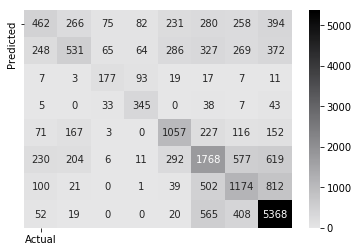

In [190]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf, cmap = cmap,xticklabels=['Actual'],yticklabels=['Predicted'], annot=True,
            fmt='d')

In [191]:
#metrics.co Cross Validate to find optimal values for hyper params
#criterion= 'gini',n_estimators = 733, min_samples_split=12, min_samples_leaf= 1,
 #                                max_features='sqrt',max_depth = 30,bootstrap=True,class_weight="balanced"
X=Underwriting_train[df_columns]
max_depth = [10,30,35] 
criterion = ['gini', 'entropy']
min_sample_split=[2,10,12]
min_sample_leaf1 =[1,2,3,5]
bootstrap1=['True','False']
#max_features1=['sqrt','log2']
from sklearn.model_selection import GridSearchCV

In [192]:
# Building the model
from sklearn import tree
my_tree_three = RandomForestClassifier(class_weight="balanced")

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=3, 
                    param_grid = dict(max_depth = max_depth,min_samples_leaf= min_sample_leaf1,criterion = criterion,min_samples_split=min_sample_split))

In [193]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 30, 35], 'min_samples_leaf': [1, 2, 3, 5], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [194]:
grid.best_score_
#grid.cv_results_

0.5082820158351138

In [195]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [175]:
#grid.fit

In [196]:
# Building the model based on new parameters


my_tree_three = RandomForestClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 10, min_samples_leaf= 1,
                                            random_state=42, class_weight="balanced")

In [197]:
my_tree_three.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [198]:
my_tree_three.score(X_train,y_train)

0.5535000628377529

In [199]:
my_tree_three.score(X_test,y_test)

0.5048479281486018

In [200]:
# Use Randomized Search
# Different parameters we want to test
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [201]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [202]:
from sklearn.model_selection import RandomizedSearchCV
forest_two = RandomForestClassifier(class_weight="balanced")

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42)

In [203]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   8.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   8.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   8.0s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  21.0s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  20.4s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=377,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 15.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [204]:
print(rf_random.best_params_)

{'n_estimators': 733, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [205]:
rf_random.best_score_

0.540329269825311

In [210]:
forest2 = RandomForestClassifier(criterion= 'gini',n_estimators = 733, min_samples_split= 5, min_samples_leaf= 1,
                                 max_features='sqrt',max_depth = 30,bootstrap=True,class_weight="balanced")

In [211]:
my_forest2 = forest2.fit(X_train, y_train)

In [212]:
# Making predictions
pred = my_forest2.predict(X_test)

In [213]:
print(my_forest2.score(X_train, y_train))
print(my_forest2.score(X_test, y_test))

0.9886640693728792
0.5460808328230251
